CMPT 459 Final Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = 'cases_2021_train_processed_2 - cases_2021_train_processed_2.csv'
test_path = 'cases_2021_test_processed_unlabelled_2 - cases_2021_test_processed_unlabelled_2.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
y = train_data['outcome_group']

In [3]:
train_data

,age,sex,province,country,latitude,longitude,date_confirmation,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,outcome_group
0,18,female,Bihar,India,25.49096,85.93903,2020-05-18,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
1,27,female,NaN,Philippines,7.07000,125.60000,2020-04-15,False,747288,13297,603746,130245,681.949809,1.779368,nonhospitalized
2,46,male,Tamil Nadu,India,13.08362,80.28252,2020-05-02,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
3,21,female,Tamil Nadu,India,13.08362,80.28252,2020-05-24,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
4,27,male,Bihar,India,26.28361,87.20347,2020-05-27,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17207,29,female,Tamil Nadu,India,13.08362,80.28252,2020-04-24,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized
17208,47,female,NaN,Philippines,16.68814,121.54992,2020-04-09,False,747288,13297,603746,130245,681.949809,1.779368,nonhospitalized
17209,30,male,Bihar,India,24.94452,86.26404,2020-05-26,False,265527,1576,262371,1580,212.762145,0.593537,hospitalized
17210,59,male,Tamil Nadu,India,12.68224,79.98008,2020-05-31,False,886673,12719,858075,15879,1139.078325,1.434463,hospitalized


In [4]:
test_data

,age,sex,province,country,latitude,longitude,date_confirmation,chronic_disease_binary,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,59,female,NaN,Philippines,14.595800,120.97720,2020-03-31,False,747288,13297,603746,130245,681.949809,1.779368
1,79,male,Tamil Nadu,India,11.139270,79.08428,2020-05-24,False,886673,12719,858075,15879,1139.078325,1.434463
2,44,female,Tamil Nadu,India,13.083620,80.28252,2020-05-19,False,886673,12719,858075,15879,1139.078325,1.434463
3,36,male,Tamil Nadu,India,13.124620,79.91815,2020-04-30,False,886673,12719,858075,15879,1139.078325,1.434463
4,52,male,Bihar,India,25.312580,86.48888,2020-04-24,False,265527,1576,262371,1580,212.762145,0.593537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,66,male,Karnataka,India,13.000000,77.58333,2020-04-09,False,997004,12567,956170,28267,1475.672533,1.260476
4300,66,male,NaN,Philippines,14.595800,120.97720,2020-03-31,False,747288,13297,603746,130245,681.949809,1.779368
4301,53,female,Tamil Nadu,India,12.682240,79.98008,2020-05-12,False,886673,12719,858075,15879,1139.078325,1.434463
4302,25,male,Tamil Nadu,India,13.160185,80.29769,2020-05-27,False,886673,12719,858075,15879,1139.078325,1.434463


In [5]:
#1.1 feature selection
selection = ['age', 'sex', 'province', 'country', 'chronic_disease_binary', 'Case_Fatality_Ratio']
train = train_data.loc[:,selection]
test = test_data.loc[:,selection]

In [6]:
#1.2 mapping the feature
#map categorical
#using label encoder so that it is consist for both train and test data
np.random.seed(0)
category = ['sex', 'province', 'country', 'chronic_disease_binary']
from sklearn import preprocessing
for each in category:
    le = preprocessing.LabelEncoder()
    a = pd.concat([train[each], test[each]])
    le.fit(a)
    train[each]=le.transform(train[each])
    test[each]=le.transform(test[each])
    

#map outcome_group
y.replace(['deceased', 'hospitalized','nonhospitalized'], [0 ,1 ,2], inplace=True)
train

,age,sex,province,country,chronic_disease_binary,Case_Fatality_Ratio
0,18,0,4,21,0,0.593537
1,27,0,48,27,0,1.779368
2,46,1,38,21,0,1.434463
3,21,0,38,21,0,1.434463
4,27,1,4,21,0,0.593537
...,...,...,...,...,...,...
17207,29,0,38,21,0,1.434463
17208,47,0,48,27,0,1.779368
17209,30,1,4,21,0,0.593537
17210,59,1,38,21,0,1.434463


In [7]:
#1.3 balance class

vc = y.value_counts()
print('Original data')
print(vc)

#undersampling (legacy code)
# weight = [0.34, 0.33, 0.33]
# def probability(x):
#     return 1/vc[x]*weight[x]

# prob = y.apply(probability)
# sample = np.random.choice(a=y.shape[0], p=prob, size=3000, replace=False)

#undersampling improved
#keep all minority class, and randomly sample from other class till count matches
hd = y[y == 2].index
sample_hd = np.random.choice(a=hd, size=vc[0], replace=False)
nhd = y[y == 1].index
sample_nhd = np.random.choice(a=nhd, size=vc[0], replace=False)
sample_d = y[y == 0].index
sample = np.concatenate([sample_hd, sample_nhd, sample_d])

y = y.iloc[sample]
train = train.iloc[sample]

print('Undersampling')
print(y.value_counts())

Original data
1    13241
2     2974
0      997
Name: outcome_group, dtype: int64
Undersampling
2    997
1    997
0    997
Name: outcome_group, dtype: int64


In [8]:
#1.4 hyperparameter tuning using gridsearch
#benefit
#ease of set up, and have control over the combination of parameter to test
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import f1_score

def macro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

def deceased_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[0], average='macro')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [9]:
#random forest
#cv = 5, because cv = 5 has better result than cv = 10
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_param = {'criterion':('gini', 'entropy'),
            'n_estimators':[50,100],
            'min_samples_split':[2,10,20],
            'max_depth':[100, None]
            }
rf_score = {'Macro F1':make_scorer(macro_f1),
            'Deceased macro F1':make_scorer(deceased_f1),
            'Accuracy': make_scorer(accuracy_score)
            }

rf_gs = GridSearchCV(estimator=rf, param_grid=rf_param, scoring=rf_score, cv=5, refit='Macro F1')
rf_gs.fit(X_train,y_train)
best_rf = rf_gs.best_estimator_
print(best_rf.get_params())
rf_res = pd.DataFrame(rf_gs.cv_results_)
rf_res.to_csv('results/rf_tunning.txt')
rf_res[['params', 'mean_test_Macro F1', 'mean_test_Deceased macro F1', 'mean_test_Accuracy']].sort_values(by='mean_test_Macro F1', ascending=False)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


,params,mean_test_Macro F1,mean_test_Deceased macro F1,mean_test_Accuracy
10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.792376,0.699489,0.793070
22,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.791114,0.696748,0.792233
11,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.790928,0.696122,0.792230
23,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.790877,0.695680,0.792231
5,"{'criterion': 'gini', 'max_depth': 100, 'min_s...",0.790605,0.696401,0.791816
16,"{'criterion': 'entropy', 'max_depth': 100, 'mi...",0.790242,0.697133,0.791394
4,"{'criterion': 'gini', 'max_depth': 100, 'min_s...",0.787291,0.691138,0.788467
15,"{'criterion': 'entropy', 'max_depth': 100, 'mi...",0.786923,0.693531,0.787633
17,"{'criterion': 'entropy', 'max_depth': 100, 'mi...",0.786701,0.689942,0.788049
8,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.783684,0.685122,0.785120


In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':range(5,56,5),
             'weights':('uniform', 'distance'),
             'p':[1,2]
            }
knn_score = {'Macro F1':make_scorer(macro_f1),
            'Deceased macro F1':make_scorer(deceased_f1),
            'Accuracy': make_scorer(accuracy_score)
            }
knn_gs = GridSearchCV(estimator=knn, param_grid=knn_param, scoring=knn_score, cv=5, refit='Macro F1')
knn_gs.fit(X_train,y_train)
best_knn = knn_gs.best_estimator_
print(best_knn.get_params())
knn_res = pd.DataFrame(knn_gs.cv_results_)
knn_res.to_csv('results/knn_tunning.txt')
knn_res[['params', 'mean_test_Macro F1', 'mean_test_Deceased macro F1', 'mean_test_Accuracy']].sort_values(by='mean_test_Macro F1', ascending=False)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


,params,mean_test_Macro F1,mean_test_Deceased macro F1,mean_test_Accuracy
12,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.783261,0.692122,0.785545
20,"{'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}",0.781022,0.687592,0.783877
24,"{'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}",0.779021,0.680288,0.783042
16,"{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}",0.778278,0.681877,0.781786
14,"{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}",0.778253,0.686318,0.780532
28,"{'n_neighbors': 40, 'p': 1, 'weights': 'uniform'}",0.776984,0.681158,0.780113
36,"{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}",0.774878,0.674691,0.778443
32,"{'n_neighbors': 45, 'p': 1, 'weights': 'uniform'}",0.774306,0.672839,0.778444
40,"{'n_neighbors': 55, 'p': 1, 'weights': 'uniform'}",0.771819,0.667002,0.776351
8,"{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",0.771813,0.666866,0.775510


In [11]:
#SVM
from sklearn.svm import SVC

# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# svm = make_pipeline(StandardScaler(), SVC())

svm = SVC()
svm_param = {'kernel':['rbf', 'poly', 'linear'],
             'cache_size':[200,500]
            }
svm_score = {'Macro F1':make_scorer(macro_f1),
            'Deceased macro F1':make_scorer(deceased_f1),
            'Accuracy': make_scorer(accuracy_score)
            }
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_param, scoring=svm_score, cv=5, refit='Macro F1')
svm_gs.fit(X_train,y_train)
best_svm = svm_gs.best_estimator_
print(best_svm.get_params())
svm_res = pd.DataFrame(svm_gs.cv_results_)
svm_res.to_csv('results/svm_tunning.txt')
svm_res[['params', 'mean_test_Macro F1', 'mean_test_Deceased macro F1', 'mean_test_Accuracy']].sort_values(by='mean_test_Macro F1', ascending=False)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


,params,mean_test_Macro F1,mean_test_Deceased macro F1,mean_test_Accuracy
2,"{'cache_size': 200, 'kernel': 'linear'}",0.772266,0.674752,0.775931
5,"{'cache_size': 500, 'kernel': 'linear'}",0.772266,0.674752,0.775931
0,"{'cache_size': 200, 'kernel': 'rbf'}",0.765050,0.672996,0.765477
3,"{'cache_size': 500, 'kernel': 'rbf'}",0.765050,0.672996,0.765477
1,"{'cache_size': 200, 'kernel': 'poly'}",0.762364,0.649323,0.766733
4,"{'cache_size': 500, 'kernel': 'poly'}",0.762364,0.649323,0.766733


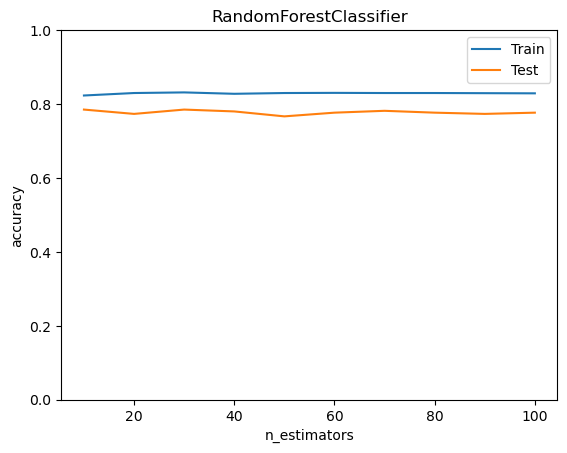

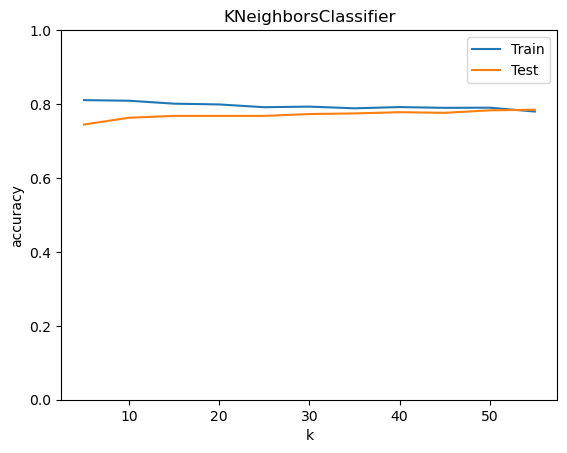

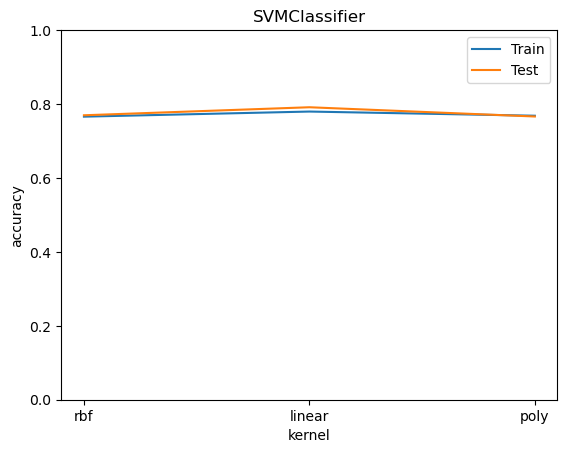

In [12]:
#1.5 overfitting -change one hyperparameter for every model

#random forest
res_train = []
res_test = []
n_est = range(10,101,10)
for each in n_est:
    rf = RandomForestClassifier(criterion='gini', n_estimators=each, min_samples_split=20, max_depth=None)
    rf.fit(X_train, y_train)
    res_train.append(rf.score(X_train, y_train))
    res_test.append(rf.score(X_test, y_test))

plt.plot(n_est, res_train)
plt.plot(n_est, res_test)
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.ylim(0,1)
plt.legend(['Train', 'Test'])
plt.title('RandomForestClassifier')
plt.savefig('plots/rf.png')
plt.show()

#knn
res_train = []
res_test = []
n_est = range(5,56,5)
for each in n_est:
    rf = KNeighborsClassifier(n_neighbors=each, weights='uniform', p=1)
    rf.fit(X_train, y_train)
    res_train.append(rf.score(X_train, y_train))
    res_test.append(rf.score(X_test, y_test))

plt.plot(n_est, res_train)
plt.plot(n_est, res_test)
plt.ylabel('accuracy')
plt.xlabel('k')
plt.ylim(0,1)
plt.legend(['Train', 'Test'])
plt.title('KNeighborsClassifier')
plt.savefig('plots/knn.png')
plt.show()

#svm
res_train = []
res_test = []
n_est = ['rbf', 'linear', 'poly']
for each in n_est:
    rf = SVC(kernel=each, cache_size=200)
    rf.fit(X_train, y_train)
    res_train.append(rf.score(X_train, y_train))
    res_test.append(rf.score(X_test, y_test))

plt.plot(n_est, res_train)
plt.plot(n_est, res_test)
plt.ylabel('accuracy')
plt.xlabel('kernel')
plt.ylim(0,1)
plt.legend(['Train', 'Test'])
plt.title('SVMClassifier')
plt.savefig('plots/svm.png')
plt.show()


In [13]:
#1.7
import csv
def create_submission_file(y_preds, file_name):
    with open(file_name, 'w') as csvfile:
        wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
        wr.writerow(["Id", "Prediction"])
        for i, pred in enumerate(y_preds):
            wr.writerow([str(i), str(pred)])
res = best_rf.predict(test)
create_submission_file(res, 'submission_rf.csv')